In [1]:
modelFileName = 'problems/logistic_delays1'

# in ./settings/
conn_name = "connection.json.example"
device_conf_name = "devices.json.example"
%pwd

'/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/dist/project_folder'

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML, Javascript

In [3]:
from hybriddomain.envs.hs.model.model_main import ModelNet as Model
from hybriddomain.settings.settings_main import Settings

### Add model, connection and device to settings: 

In [4]:
model = Model()
model.io.loadFromFile(modelFileName)
settings = Settings(model, conn_name, device_conf_name, conn_name)


INFO:block_main.block_io:DefaultBound not set
INFO:block_main.block_io:DefaultBound not set
INFO:settings_main:device_conf_rpath
INFO:settings_main:devices.json.example


Please enter password for user hpc:
········


In [5]:
print(model.project_path)
print(settings.paths['model']['path'])
print(settings.paths["hd"]["paths"])
print(settings.paths["hd"]["device_conf"])

logistic_delays1
logistic_delays1
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/dist/project_folder/settings/connection.json.example
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/dist/project_folder/settings/devices.json.example


### Progress:

In [6]:
from hybriddomain.solvers.hs.remoterun.progresses.progress_notebook import ProgressNotebook

In [7]:
progress = ProgressNotebook(100, prefix='solving')
display(progress.progress)

### Run solver:

In [8]:
from hybriddomain.solvers.hs.remoterun.remoterun import remoteProjectRun

In [10]:
clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))
def run(event):
    remoteProjectRun(settings, 1, progress)
    Javascript("alert('Done');")
bTest.on_click(run)
display(progress.progress)
display(bTest)
display(progress.progress)

INFO:remoterun:
connect ...
INFO:remoterun:
connection established
INFO:remoterun:
files/folders routine
INFO:remoterun:
files/folders routine complited
INFO:remoterun:
Running preprocessor:
INFO:remoterun:command:
INFO:remoterun:~/anaconda3/bin/python3 -c "import hybriddomain.gens.hs.tests.tests_gen_1d as ts; ts.run()" -t /clusterhome/hpc/tracer/workspace/problems/logistic_delays1 -d /clusterhome/hpc/tracer/workspace/settings/device_conf/devices.json -p /clusterhome/hpc/tracer/workspace/settings/paths/connection.json -w /clusterhome/hpc/tracer/workspace -u hpc 2>&1
INFO:remoterun:
Running solver:
INFO:remoterun:12-10 13:13:16 Performance (10^6): 0.00133984

INFO:remoterun:INFO:postproc.video:Creating images for block 0 value U

INFO:remoterun:INFO:postproc.video:Creating video file: 0

INFO:remoterun:INFO:postproc.video:Creating images for block 1 value U

INFO:remoterun:INFO:postproc.video:Creating video file: 1

INFO:remoterun:INFO:postproc.video:Creating out file: 0

INFO:remoterun

### Results:

In [9]:
# get results (for TRAC-11 result_format=1):
model.readResults(result_format=1)

In [10]:
# available results:
print(model.results_arrays.keys())

dict_keys(['name1', 'name2'])


In [10]:
# available data:
time = model.results_arrays['name1']['timevalues'][3]
var = 0
first_30_res = model.results_arrays['name1']['resvalues'][time][var][:30]
print(first_30_res)


[ 1.       1.       1.       1.       1.       1.       1.       1.       1.
  1.       1.       2.68504  2.68504  2.68504  2.68504  2.68504  2.68504
  2.68504  2.68504  2.68504  2.68504  2.68504  2.68504  2.68504  2.68504
  2.68504  2.68504  2.68504  2.68504  2.68504]


##### Video:

In [11]:
# available plots:
model.plots_paths

{'name1': ['problems/logistic_delays1/out/name1-block0.mp4'],
 'name2': ['problems/logistic_delays1/out/name2-block1.mp4']}

In [12]:
display(HTML(model.get_video('name1')))

##### .out:

For ploting it is better to use ``result_format=0``:

In [13]:
# get results:
model.readResults(result_format=0)

In that case data access will be:

In [14]:
result_name = 'name1'
var = 0

time = model.results_arrays['name1']['timevalues'][3]

x_size = len(model.results_arrays['resvalues'][result_name][var][time])
print(x_size)

first_30_res = model.results_arrays['resvalues'][result_name][var][time][:30]
print(first_30_res)


361
[ 1.       1.       1.       1.       1.       1.       1.       1.       1.
  1.       1.       2.68504  2.68504  2.68504  2.68504  2.68504  2.68504
  2.68504  2.68504  2.68504  2.68504  2.68504  2.68504  2.68504  2.68504
  2.68504  2.68504  2.68504  2.68504  2.68504]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

##### U(x, t-fixed):

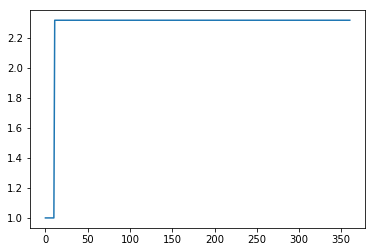

In [17]:
%matplotlib inline

result_name = 'name1'
var = 0

def f(t):    
    time = model.results_arrays[result_name]['timevalues'][t]
    result = model.results_arrays['resvalues'][result_name][var][time]
    plt.plot(result)
w = interactive(f,t=(0,100,1))
display(w)

##### U(x-fixed, t):

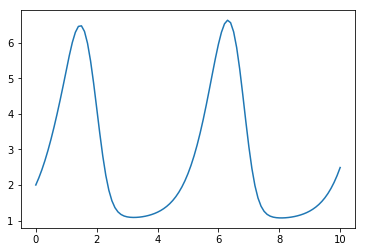

In [18]:
%matplotlib inline

result_name = 'name1'
var = 0
times = model.results_arrays[result_name]['timevalues']
result = model.results_arrays['resvalues'][result_name][var]
result_x = np.array([result[time] for time in times]).T

def f(x):
    
    plt.plot(times, result_x[x])
    
w = interactive(f,x=(0,x_size,1))
display(w)